# **Credit Card Fraud Detection**

---------------

 

## **Objective**

The objective of this project is to build a machine learning-based fraud detection system for a financial organization to ensure their customers' security and confidence. The model will analyze customer transaction data to identify and prevent fraudulent activities, providing advantages over traditional fraud detection methods such as quick real-time detection, efficient verification procedures, and the ability to uncover hidden relationships in the data. The model will be trained on a dataset containing transaction information and labels indicating whether the transactions are fraudulent or legitimate, and the task is to classify these transactions based on the provided data.The problem is significant because false positive fraud detections can result in inconvenience for customers, while false negatives can result in monetary losses for the credit card company.

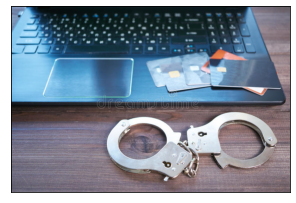

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

credit_card_image=np.array(mpimg.imread('creditcardpic.jpg'))
fig, ax=plt.subplots(figsize=(5,5))
                          
ax.imshow(credit_card_image)
ax.set(xticks=[],yticks=[])   
plt.show()    

## **Dataset**

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud Links to an external site.

The site also provides a detailed description of the dataset. Note that this is an imbalanced dataset. 

**How to reduce this loss for the credit card company i.e the need to reduce False Negatives?**
* **The credit card company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can provide fraud prevention mechanism to control the fraud transaction rate.

## **Data Description**
This credit card dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced; the positive class (frauds) account for 0.172% of all transactions.

To protect the user’s identity and the security of their confidential information, the dataset provider has applied PCA transformation on the original numerical features and compressed it into 28 principal components. Only two features have not been transformed i.e. Time and Amount. 

#### Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

#### The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive information. 

#### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')



## **Loading the dataset**

In [3]:
df = pd.read_csv("creditcard.csv")

## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### **Understand the shape of the dataset**

In [6]:
df.shape

(284807, 31)

### The dataset has 284807 rows and 31 columns. 

### **Check the data types of the columns for the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All the columns are float numbers except class which is integer 0 or 1

### **Check the percentage of missing values in each column**

In [8]:
pd.DataFrame(data={'% of Missing Values':round(df.isna().sum()/df.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [9]:
df.isnull().sum().sum()

0

### **Check the number of unique values in each column**

In [10]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

## **Exploratory Data Analysis**

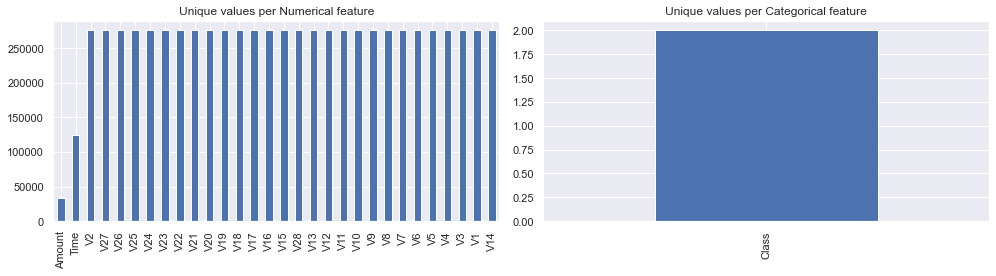

In [11]:
# Combined Plot for unique values
# Class should be categorical Variable
df[['Class']]=df[['Class']].astype('str')

plt.subplots(1,2,figsize=(14,4),squeeze=False)
plt.subplot(1,2,1)
df.select_dtypes(include="number").nunique().sort_values().plot.bar(title="Unique values per Numerical feature");
plt.subplot(1,2,2)
df.select_dtypes(exclude="number").nunique().sort_values().plot.bar(title="Unique values per Categorical feature");
plt.tight_layout()
plt.show()

### **Understanding the target variable Class of the dataset**

In [12]:
# Understanding the target feature
class_counts = df['Class'].value_counts()
class_counts_percentage = df['Class'].value_counts(normalize=True) * 100

# Printing the class counts and percentage
print("Class counts: \n", class_counts)
print("\nClass counts percentage: \n", class_counts_percentage)

Class counts: 
 0    284315
1       492
Name: Class, dtype: int64

Class counts percentage: 
 0    99.827251
1     0.172749
Name: Class, dtype: float64


In [13]:
df = pd.read_csv("creditcard.csv")
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Transactions {}'.format(Total_transactions))
print('Number of Normal/ Non-Fraudulent Transactions  {}'.format(normal))
print('Number of Fraudulent Transactions {}'.format(fraudulent))
print('Percentage of fraud Transactions {}'.format(fraud_percentage))

Total number of Transactions 284807
Number of Normal/ Non-Fraudulent Transactions  284315
Number of Fraudulent Transactions 492
Percentage of fraud Transactions 0.17


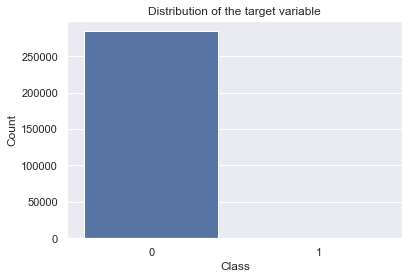

In [14]:
#Plotting the count of each class in the target variable
sns.countplot(x='Class', data=df)

#Adding the title, x-axis label and y-axis label to the plot
plt.title("Distribution of the target variable")
plt.xlabel("Class")
plt.ylabel("Count")

#Displaying the plot
plt.show()

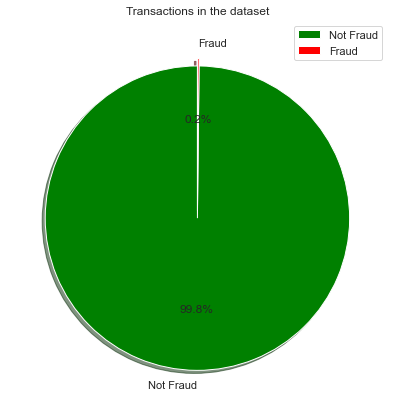

In [15]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = df['Class'].value_counts(sort = True)

colors = ["green","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Transactions in the dataset')
plt.legend()
plt.show()

We visualize highly imbalanced dataset with very few fraud transcations which need to be taken care of while modelling otherwise our results will not be accurate as taining data might not pick fraud transactions and will not have proper representation of the problem we are trying to solve

### **Understanding the variable Amount of the dataset**

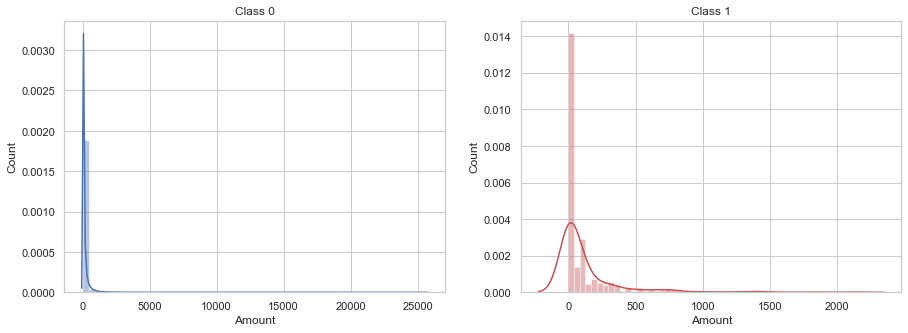

In [16]:
# Create a subplot with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of amount for class 0
sns.distplot(df[df['Class'] == 0]['Amount'], kde=True, ax=axs[0], color='b')
axs[0].set_title('Class 0')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Count')

# Plot distribution of amount for class 1
sns.distplot(df[df['Class'] == 1]['Amount'], kde=True, ax=axs[1], color='r')
axs[1].set_title('Class 1')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Count')

plt.show()

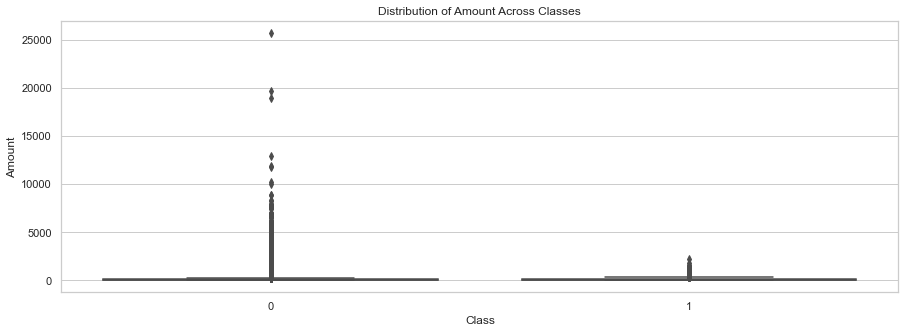

In [17]:
# Create box plots to show the distribution of variables across classes
plt.figure(figsize=(15, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Amount Across Classes')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

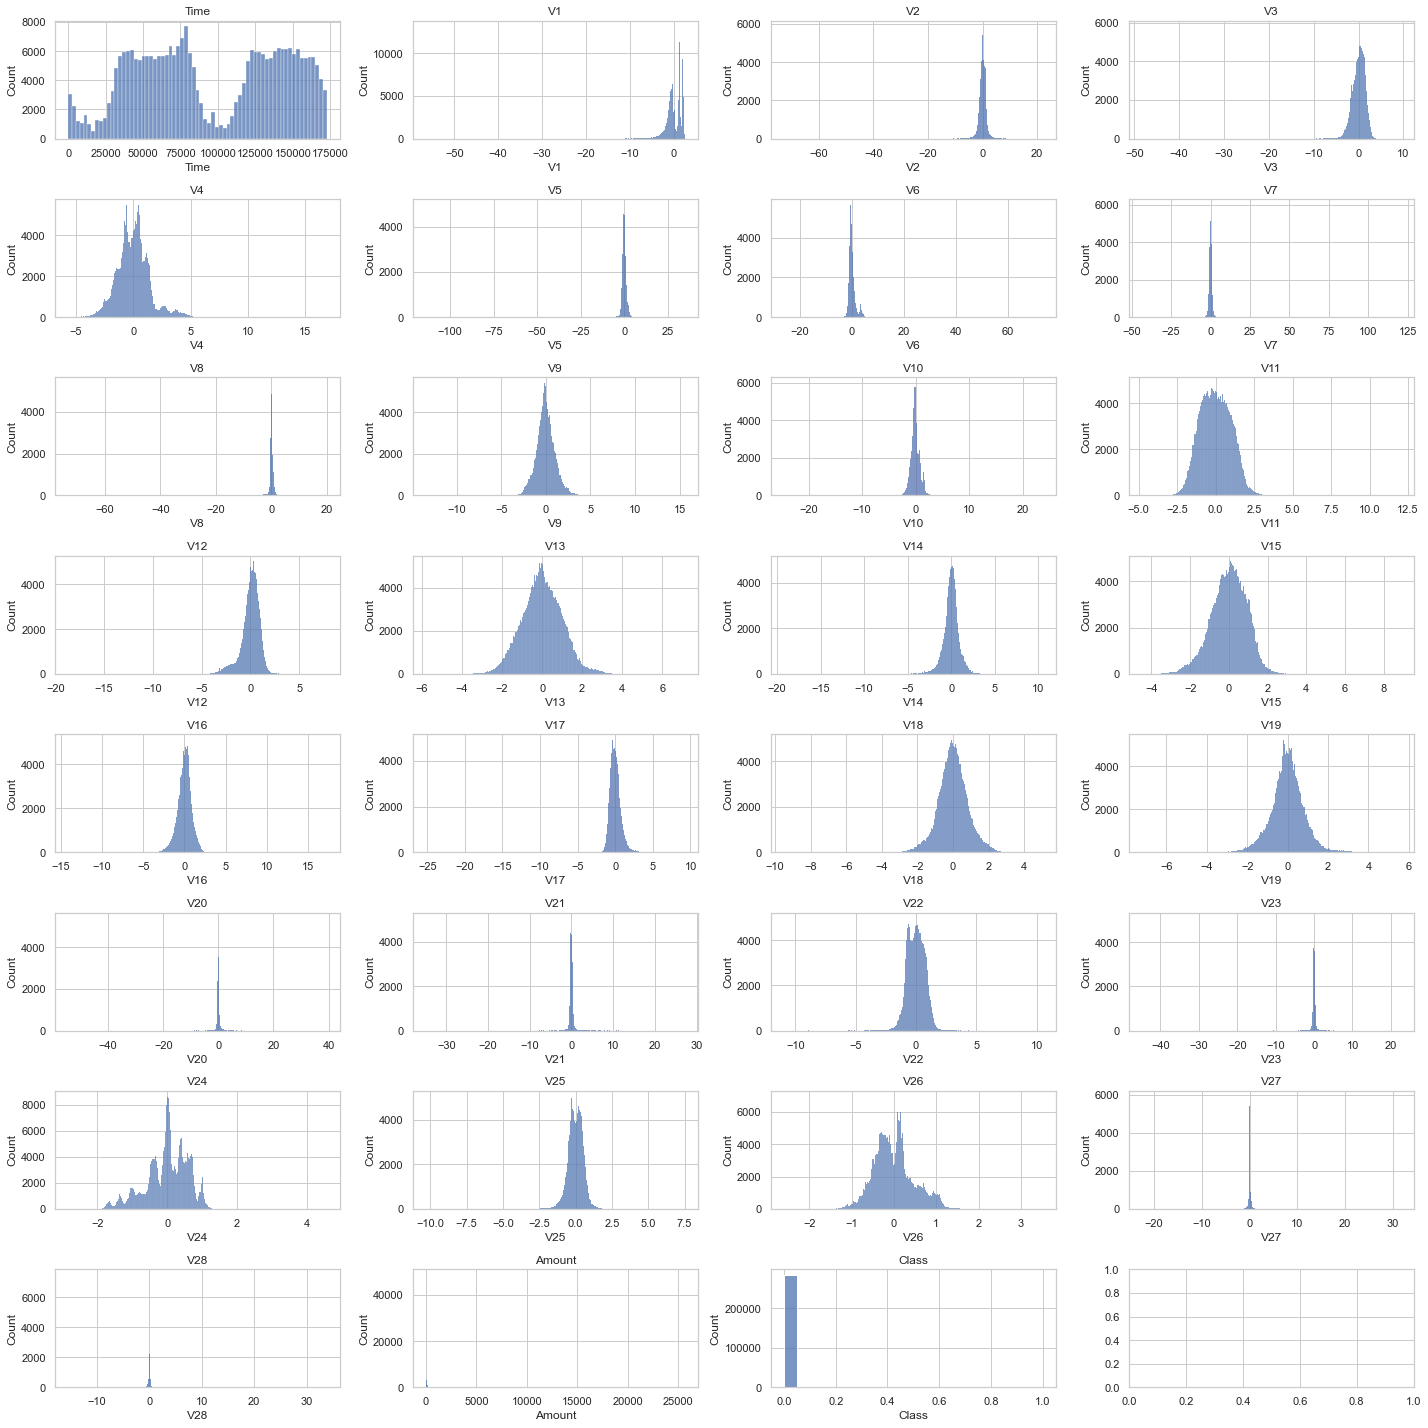

In [18]:
# Create a subplot with multiple plots
fig, axs = plt.subplots(8, 4, figsize=(20, 20))
axs = axs.ravel()

# Plot histograms for all columns
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

In [19]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

By examining the histograms, we can see if the data is normally distributed, skewed to the left or right, or has multiple peaks. This information can be useful for preprocessing the data, such as scaling or transforming the variables, and for selecting the appropriate modeling techniques.

### Check for Correlation between features

In [20]:
df = pd.read_csv("creditcard.csv")
Corr=pd.DataFrame(df.corr()['Class'].sort_values(ascending=False))
Corr

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


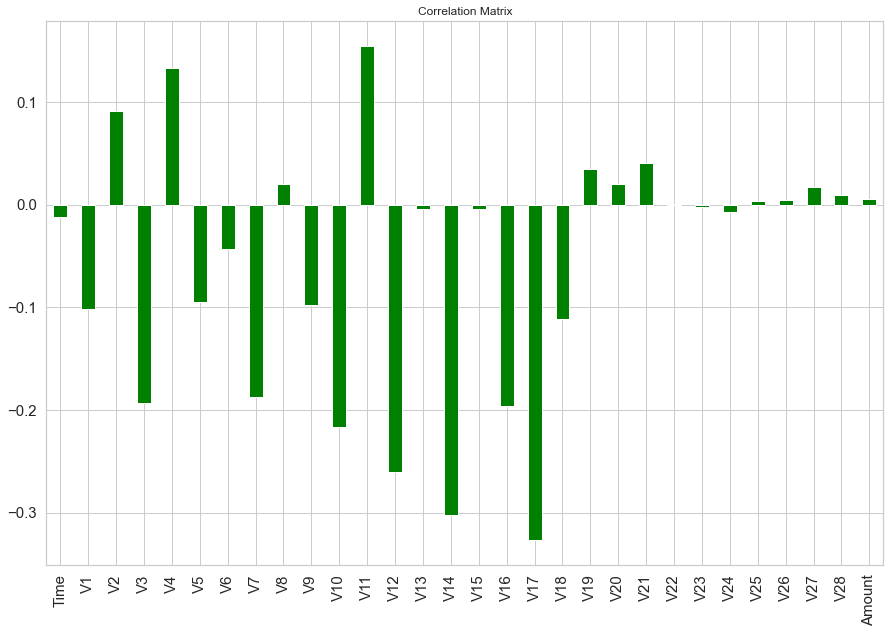

In [21]:
a = df.drop('Class', axis=1)
a.corrwith(df['Class']).plot(kind='bar', figsize=(15,10), color=['green'])
plt.title("Correlation Matrix")
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


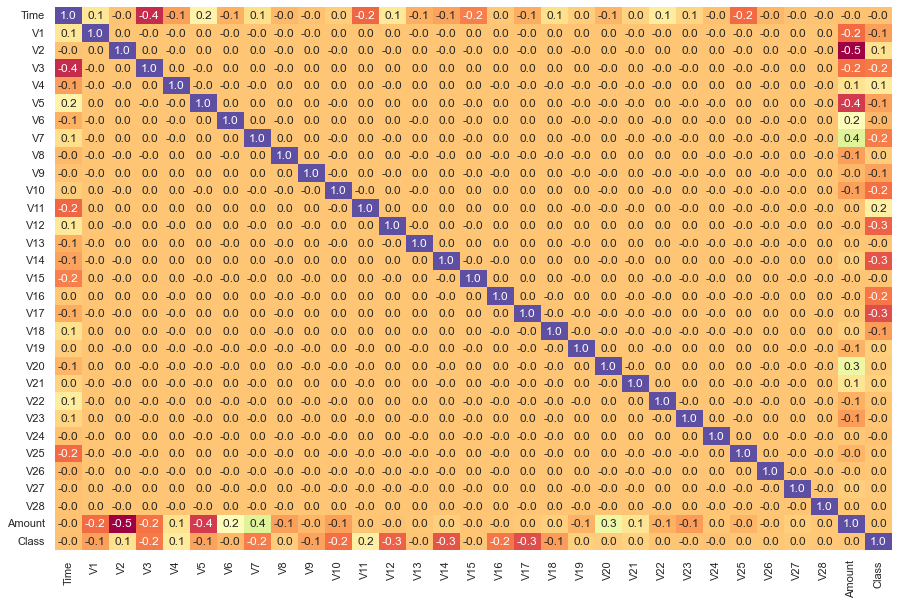

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cbar=False, fmt='.1f', cmap="Spectral")
plt.show()

### Check for Outliers

Let's find the percentage of outliers, in each column of the data, using IQR

In [23]:
Q1 = df.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (Q1 - 1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [25]:
(
    (df.select_dtypes(include=["float64", "int64"]) < lower)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Time       0.000000
V1         2.479574
V2         4.749181
V3         1.180800
V4         3.914230
V5         4.316959
V6         8.063355
V7         3.141777
V8         8.473809
V9         2.908285
V10        3.334188
V11        0.273870
V12        5.388912
V13        1.182555
V14        4.967926
V15        1.016127
V16        2.873525
V17        2.605273
V18        2.644949
V19        3.583128
V20        9.750463
V21        5.090114
V22        0.462418
V23        6.510023
V24        1.676223
V25        1.884434
V26        1.964839
V27       13.750715
V28       10.653530
Amount    11.201972
Class      0.172749
dtype: float64

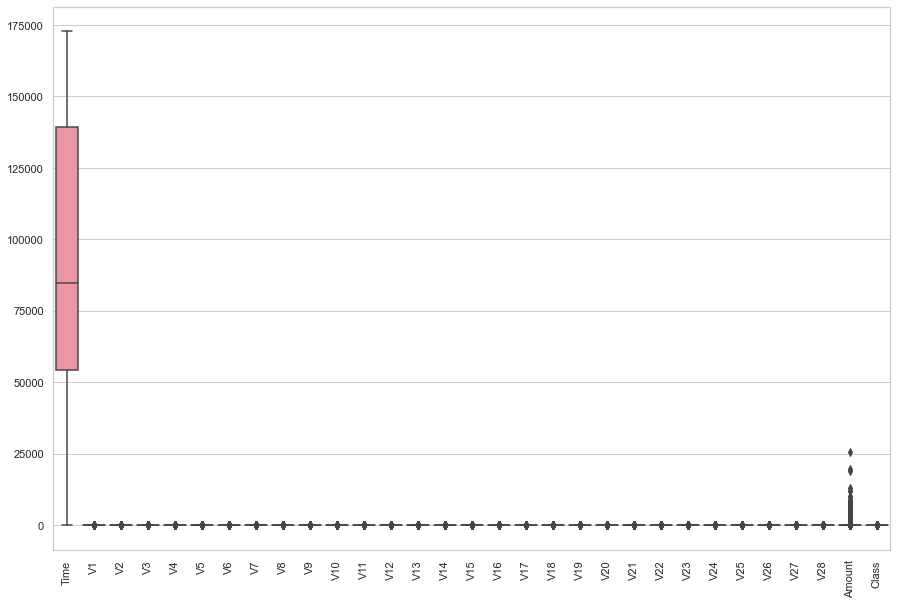

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

We see outliers in the variable Amount

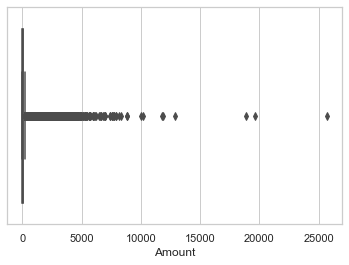

In [27]:
plt.tight_layout()
sns.boxplot(x=df['Amount'], data=df)
plt.show()

## **Data Preprocessing**

### **Scaling the data**

When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# normalise the amount column and make new column normAmt
df['normAmt'] = sc.fit_transform(np.array(df['Amount']).reshape(-1, 1))
  
# drop Time and Amount columns as they are not relevant for prediction purpose and we have new normAmt 
df = df.drop(['Time', 'Amount'], axis = 1)

Now visualize the dataframe

In [29]:
df.head().T

,0,1,2,3,4
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739
V10,0.090794,-0.166974,0.207643,-0.054952,0.753074


In [30]:
df.duplicated().any()

True

In [31]:
my_data = df.drop_duplicates()
my_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


In [32]:
df.drop_duplicates(inplace=True)

## **Model Building and Evaluation**


Now we define Indepndent and Dependent/Target variable

In [33]:
# Independent variable
X = df.drop('Class', axis=1)

# Dependent/Target variable
y = df['Class']

In [34]:
# split into 70:30 ratio, training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (192964, 29)
Number transactions y_train dataset:  (192964,)
Number transactions X_test dataset:  (82699, 29)
Number transactions y_test dataset:  (82699,)


### First we build model without balancing data and compare it with using techniques to handle balanced data

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score


# Logistic Regression

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [37]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
def metrics_score(actual, predicted):
   
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

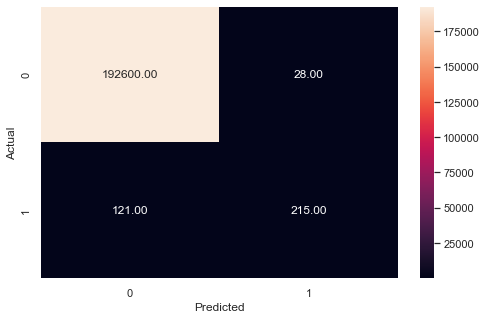

In [40]:
# Checking the performance on the training data
y_pred_train = lr.predict(X_train)

metrics_score(y_train, y_pred_train)

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that a fraud did not occur and in real the fraud was not reported.

* False Positive (Actual=0, Predicted=1): Model predicts that a fraud did not occur and in real the fraud was reported.

* False Negative (Actual=1, Predicted=0): Model predicts that a fraud occured and in real the fraud was not reported.

* True Positive (Actual=1, Predicted=1): Model predicts that a fraud occured and in real the fraud was reported.

accuracy of base model : 0.9991051886963567

Base Model: Train Score 1.00 & Test Score 1.00 



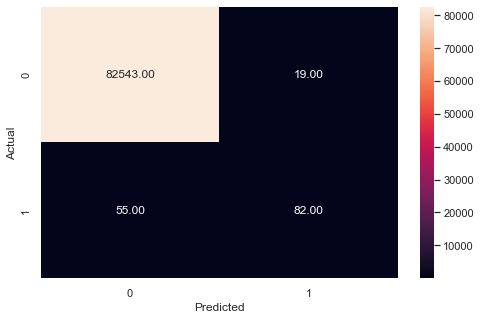

Confusion Matrix :

 None


Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     82562
           1       0.81      0.60      0.69       137

    accuracy                           1.00     82699
   macro avg       0.91      0.80      0.84     82699
weighted avg       1.00      1.00      1.00     82699



In [41]:
predictions = lr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print('accuracy of base model :', accuracy)
print("\nBase Model: Train Score {:.2f} & Test Score {:.2f} \n".format(lr.score(X_train, y_train), lr.score(X_test, y_test)))

# print confusion matrix

print('Confusion Matrix :\n\n',metrics_score(y_test, predictions))
  
# print classification report
print('\n\nClassification Report :\n', classification_report(y_test, predictions))

### Here the accuracy of logistic regression model using imbalanced data comes out as 100% but we see that recall of Class 1 which is only 492 fraud transactions is very less which means that the model is baised towards majority class 0

# Now, we will apply different imbalanced data handling techniques

# SMOTE

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [42]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 336
Before OverSampling, counts of label '0': 192628 



In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [44]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (385256, 29)
After OverSampling, the shape of train_y: (385256,) 

After OverSampling, counts of label '1': 192628
After OverSampling, counts of label '0': 192628


SMOTE Algorithm has oversampled the minority instances and made it equal to majority class.
Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.

In [45]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
predictions_lr1 = lr1.predict(X_test)

accuracy of base model : 0.9782585037303958

Base Model: Train Score 0.82 & Test Score 1.00 



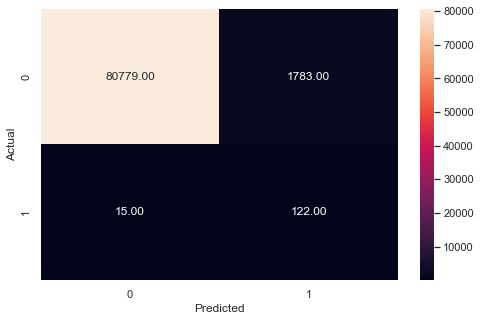

Confusion Matrix :

 None
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     82562
           1       0.06      0.89      0.12       137

    accuracy                           0.98     82699
   macro avg       0.53      0.93      0.55     82699
weighted avg       1.00      0.98      0.99     82699



In [46]:
lr_acc = accuracy_score(y_test, predictions_lr1)
print('accuracy of base model :', lr_acc)
print("\nBase Model: Train Score {:.2f} & Test Score {:.2f} \n".format(lr.score(X_train_res, y_train_res), lr.score(X_test, y_test)))

# print confusion matrix
print('Confusion Matrix :\n\n',metrics_score(y_test, predictions_lr1))

# print classification report
print(classification_report(y_test, predictions_lr1))

We have reduced the accuracy to 98% as compared to previous model but the recall value of fraud transactions class has also improved to 92%. This is a good model compared to the previous one.


## Using SMOTE we have reduced False negatives from 56 to 12. The F1 score of simple logistic regression model was 1.00 whereas after applying SMOTE and resampling F1 score is 0.99, which is not bad.

In [47]:
# Printing the coefficients of logistic regression


cols=X_train.columns

coef_lg=lr1.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
normAmt,4.212532
V23,1.838206
V28,1.738774
V2,1.585692
V5,1.308473
V1,1.039807
V25,0.927859
V3,0.817856
V4,0.692568
V11,0.680235


Features which positively affected fraudulent transaction  are: V23, V28, V2, V5, V1, V25, V3, V4, V11, V22, V19 and V15 

In [48]:
y_pred_logit_proba = lr1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = roc_curve(y_test,  y_pred_logit_proba)

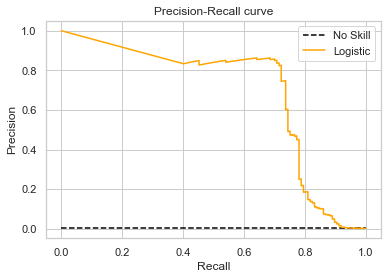

In [49]:
logit_precision, logit_recall, _ = precision_recall_curve(y_test, y_pred_logit_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [50]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, class_weight='balanced')
xgb.fit(X_train, y_train)

[19:30:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)

In [51]:
y_pred_xgb = xgb.predict(X_test)

In [52]:
print("Accuracy XGB:", accuracy_score(y_test, y_pred_xgb))
print("Precision XGB:", precision_score(y_test, y_pred_xgb))
print("Recall XGB:", recall_score(y_test, y_pred_xgb))
print("F1 Score XGB:", f1_score(y_test, y_pred_xgb))


Accuracy XGB: 0.9995163182142468
Precision XGB: 0.9619047619047619
Recall XGB: 0.7372262773722628
F1 Score XGB: 0.8347107438016529


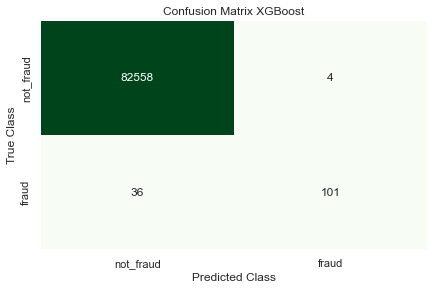

In [53]:
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [54]:
y_pred_xgb_proba = xgb.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test,  y_pred_xgb_proba)

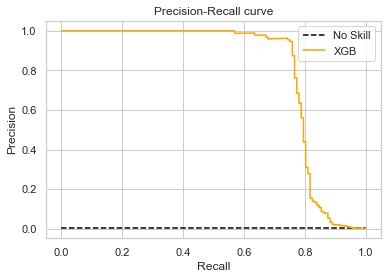

In [55]:
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, y_pred_xgb_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(xgb_recall, xgb_precision, color='orange', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
# Build the model with the random forest regression algorithm:
rfmodel = RandomForestClassifier(max_depth=6, random_state=42,
                               class_weight='balanced',n_estimators=10)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=10,
                       random_state=42)

In [57]:
# let's check in-sample and out-of-sample accuracy
y_train_hat  = rfmodel.predict(X_train)
y_test_hat  = rfmodel.predict(X_test)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  99.8372753466968
Out-of-sample Accuracy:  99.83796660177269


Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82562
           1       0.51      0.76      0.61       137

    accuracy                           1.00     82699
   macro avg       0.75      0.88      0.80     82699
weighted avg       1.00      1.00      1.00     82699



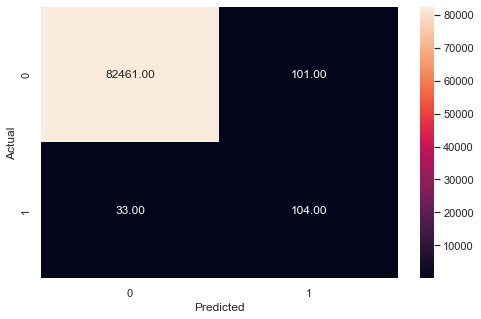

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")

print(classification_report(y_test,y_test_hat))
metrics_score(y_test, y_test_hat)

<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Importance'>

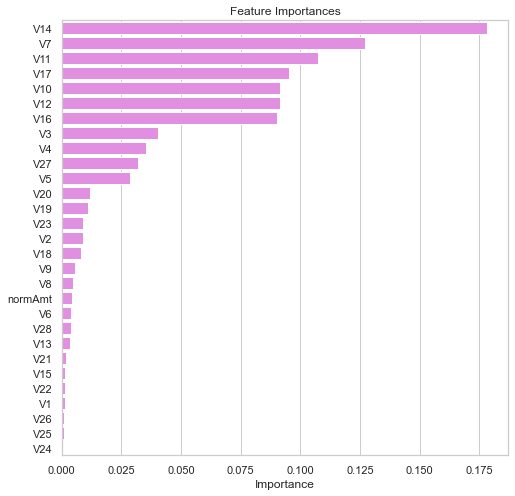

In [59]:
importances = rfmodel.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(importance_df.Importance, importance_df.index,color="violet")

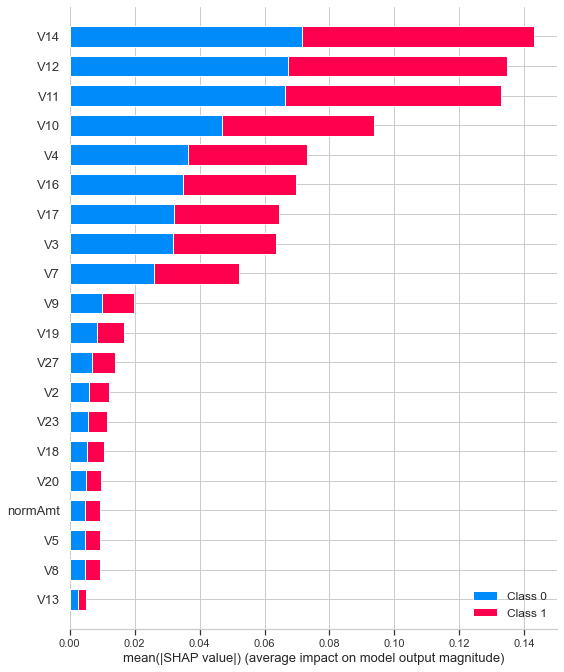

In [61]:
import shap
shap_values = shap.TreeExplainer(rfmodel).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

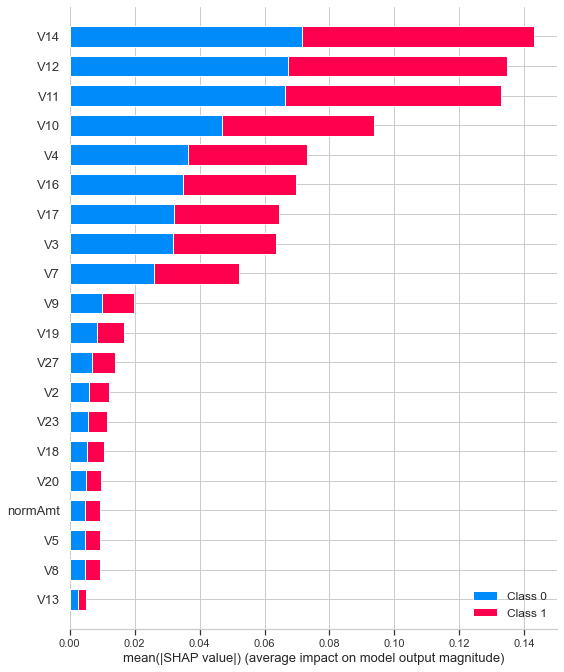

In [62]:
shap.summary_plot(shap_values, X_test)

In [66]:


# Independent variable
X = df.drop('Class', axis=1)

# Dependent/Target variable
y = df['Class']

df.drop_duplicates(inplace=True)

# split into 70:30 ratio, training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Handling Imbalanced Data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# logistic regression 
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state=2)
lr1.fit(X_train_res, y_train_res)

y_pred_lr1 = lr1.predict(X_test)

lr1_acc = accuracy_score(y_test, y_pred_lr1)
lr1_f1= f1_score(y_test, y_pred_lr1)
lr1_precision = precision_score(y_test, y_pred_lr1)
lr1_recall = recall_score(y_test, y_pred_lr1)

# xgboost algorithm
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2)
xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test)

xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_f1= f1_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)

# randomforest algorithm
rf_model = RandomForestClassifier(random_state=2)
rf_model=rf_model.fit(X_train_res, y_train_res)

y_pred_rf = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1= f1_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)




In [67]:
MetricSDataFrame = pd.DataFrame({ 'Balanced_Accuracy': [lr1_acc,rf_acc,xgb_acc],
                                'F1_Score': [lr1_f1,rf_f1,xgb_f1],
                                'Precision': [lr1_precision, rf_precision, xgb_precision],
                                'Recall': [lr1_recall, rf_recall, xgb_recall]},
                               index=['Logistic_Regression', 'RandomForest', 'XGBoost'])

In [68]:
display(MetricSDataFrame)

,Balanced_Accuracy,F1_Score,Precision,Recall
Logistic_Regression,0.978259,0.119491,0.064042,0.890511
RandomForest,0.999383,0.801556,0.858333,0.751825
XGBoost,0.999202,0.762590,0.751773,0.773723


Random Forest has best balanced accuracy of 0.9993 and F1 score of 0.80 over the other two model, but with proper domain knowledge and tuning the models can be better suited to solve the problem of credit card company.